# Clustering with Python


by [Daniel Ferrari](https://www.linkedin.com/in/danielgomesferrari/)

Thanks to [Python Porto](https://www.meetup.com/pyporto/events/258956469/)

Thanks to [Talkdesk](https://www.talkdesk.com/) for host the event

**2019-04-24**


## Agenda

1. What is Clustering?
1. Measuring the Similarity
1. How the k-Means algorithm works?
1. The Dataset and the Question
1. Is my clustering solution good?
1. How to choose the number of clusters?
1. Ways to present a solution

# What is Clustering?

## The Concept

* Is the most basic hability on nature
* Is the concept of put similar things together
* Reflects the hability to identify set of similar features

## The Definition

**Intuitively:**
```
Objects belonging to the same group are more similar to each other 
than objects belonging to different groups
```

**From Wiki:**

```
Clustering is the task of grouping a set of objects in such a way that 
objects in the same group are more similar to each 
other than to those in other groups (also called clusters)
```

**Which means:**
```
A cluster can be defined according to 
internal cohesion (homogeneity) and 
external isolation (separation) 
from their objects
```


## How to Group these Objects?

<img src="images/objects.png" width="683" height="465">

### Why a Clustering Problem is Hard?

Number of possible solutions: $N(n,k)=\frac{1}{k!}\sum_{i=1}^k (-1)^{k-1} (\frac{k}{i}) i^n$

<img src="images/clustering-table.png" align="left"> 

## Similarity (in Clustering)

* It's a value that shows how similar two objects are
* It's defined by a mathematical function over the object's attributes
* Any function can be used, if satisfy the conditions:

  * Symmetry: $f(x,y) = f(y,x)$
  * Positivity: $f(x,y) >= 0$
  * Reflexivity: $f(x,x) = 0$
  * Triangle Inequality: $f(x,y) <= f(x,k) + f(k,y)$


## Similarity Measures

**Euclidean Distance**
* The most commonly used
* Tend to form hyperspherical clusters

**Pearson Correlation**
* Derived from the correlation coeficient
* Widely ussed for biological analyzes

**Cosine Similarity**
* Useful in sparse problems
* Most common for document clustering

```R. Xu and D. Wunsch II, "Survey of Clustering Algorithms", IEEE Trans. on Neural Networks, v16, n3, 2005.```

### Euclidean Distance

**For a 2D space** 

<img src="images/euclidean-distance-2D.png" align="left"> 

### Euclidean Distance

**For a nD space**

<img src="images/euclidean-distance.png" align="left">

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial.distance import pdist
from numpy.random import randint

In [3]:
objects = np.concatenate([
    randint(0, 10, (100,1)).astype('float64'), 
    randint(0, 500, (100,1)).astype('float64'), 
    randint(0, 1000, (100,1)).astype('float64'), 
    randint(0, 5000, (100,1)).astype('float64') 
], axis=1)

normalized = MinMaxScaler().fit_transform(objects)

In [4]:
print('Not normalized data')
print('Dimensions:', objects.shape)
print('Min values:', np.amin(objects, axis=0))
print('Max values:', np.amax(objects, axis=0))

print('\nNormalized data')
print('Dimensions:', normalized.shape)
print('Min values:', np.amin(normalized, axis=0))
print('Max values:', np.amax(normalized, axis=0))

Not normalized data
Dimensions: (100, 4)
Min values: [ 0.  4.  7. 35.]
Max values: [   9.  493.  975. 4983.]

Normalized data
Dimensions: (100, 4)
Min values: [0. 0. 0. 0.]
Max values: [1. 1. 1. 1.]


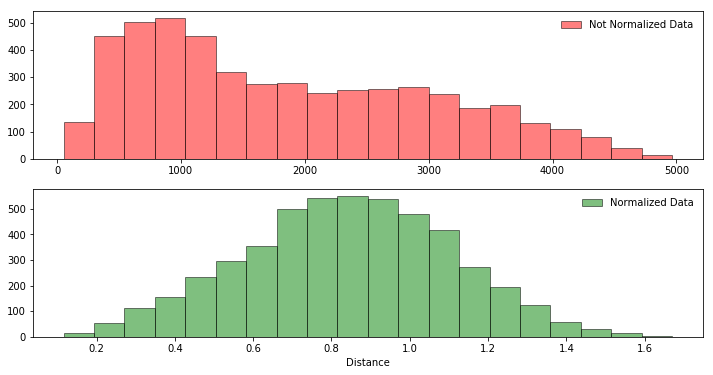

In [5]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

axis[0].hist(pdist(objects, 'euclidean'), bins=20, **{'edgecolor':'k', 'facecolor':'r', 'alpha': 0.5})
axis[0].legend(labels=['Not Normalized Data'], frameon=False)

axis[1].hist(pdist(normalized, 'euclidean'), bins=20, **{'edgecolor':'k', 'facecolor':'g', 'alpha': 0.5})
axis[1].legend(labels=['Normalized Data'], frameon=False)
axis[1].set_xlabel('Distance')

plt.show()

# The k-Means Algorithm

- One of the most used clustering algorithm
- It's very simple to code
- It's very fast
- One of the first algorithms on distribuited data analizes
- Need the number of clusters
- Could not converge for no-euclidean distances

## How the Algorithm Works

- The algorithm moves the centroids to optimize the following function:

$$\sum_{i=1}^k\sum_{x_j \in g_i}||x_j - c_i||^2$$

### k-Means Steps

```
1. Choose k centroids randomly
2. While (solution does not stabilize) or (not maximum number of iterations) do
    2.1. Determine the objects closest to each centroid
    2.2. Recalculate the position of the centroids
```

## How k-Means Moves the Centroids?

In [6]:
from scipy.spatial.distance import cdist
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [7]:
def get_labels(objs, centroids):
    """
        Given a set of objects (m, n) and centroids (l, n) the function returns
        the closest centroid to each object as a vector (m, 1) with values between 0 and l-1
    """
    return np.argmin(cdist(objs, centroids), axis=1)

In [8]:
def one_kmeans_interaction(objs, centroids):
    """
        Given a set of objects (m, n) and centroids (l, n) the function returns
        the a new set of centroids (l, n) where each centroid is the mean between
        the closer objects to it.
    """
    labels = get_labels(objs, centroids)
    return np.stack([
        np.mean(objs[labels == l], axis=0)
        for l in np.unique(labels)
    ])

In [9]:
def plot_kmeans(axis, objs, colors, legend, centroids, previous, title, hide_legend=False):

    polygons = []
    polycolor = []
    labels = get_labels(objs, centroids)
    
    for c in range(len(centroids)):
        axis.plot(objs[labels==c, 0], objs[labels==c, 1], '.', color=colors[c], alpha=0.5, markersize=4)
        axis.plot(centroids[c,0], centroids[c,1], 'o', color=colors[c], markersize=6, label=legend[c])

        grp = objs[labels==c, :]
        if grp.shape[0] > 1:
            vertices = ConvexHull(grp).vertices
            polygons.append(Polygon(grp[vertices,:], closed=True))
            polycolor.append(colors[c])
        
        if previous is not None:
            axis.plot(previous[c,0], previous[c,1], 'o', markeredgecolor=colors[c], markerfacecolor="None", markersize=8, alpha=0.5)
            axis.plot([previous[c,0], centroids[c,0]], [previous[c,1], centroids[c,1]], colors[c], alpha=0.1)

    p = PatchCollection(polygons, alpha=0.2)
    p.set_color(polycolor)
    axis.add_collection(p)
    
    axis.set_title(title, fontdict={'fontsize':16})
    if not hide_legend:
        axis.legend(ncol=4, bbox_to_anchor=(0.95, -0.05), frameon=False)

### The Dataset

The ruspini dataset is a small two-dimensional labeled data used just to help visualizing concepts. The dataset has 74 objects with 4 groups.

In [10]:
data = np.loadtxt('data/ruspini.data', delimiter=',', dtype=float)

# Split the label from the attributes
label = data[:,2]
objs = np.delete(data, 2, 1)

In [11]:
# Apply a simple normalization
objs = MinMaxScaler().fit_transform(objs)

### Selected Initial State

To be able demonstrate the movimentation, the centroids were chosen and the color of each one too.

In [12]:
k = 4
initial_centroids = objs[[1,5,73,74], :]
colors = ['red', 'blue', 'green', 'orange']
legend = ['Centroid A', 'Centroid B', 'Centroid C', 'Centroid D']

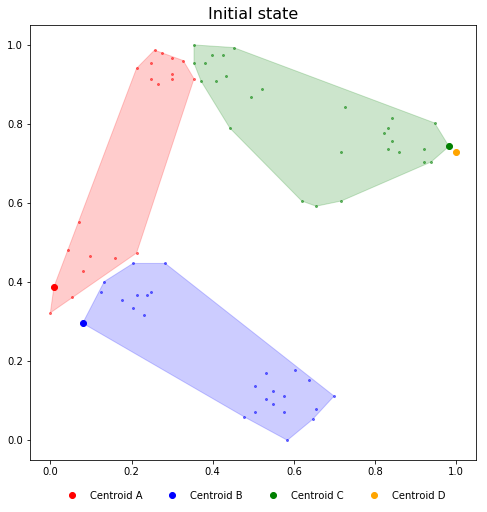

In [13]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plot_kmeans(axis, objs, colors, legend, initial_centroids, None, 'Initial state')

### The k-Means Interactions

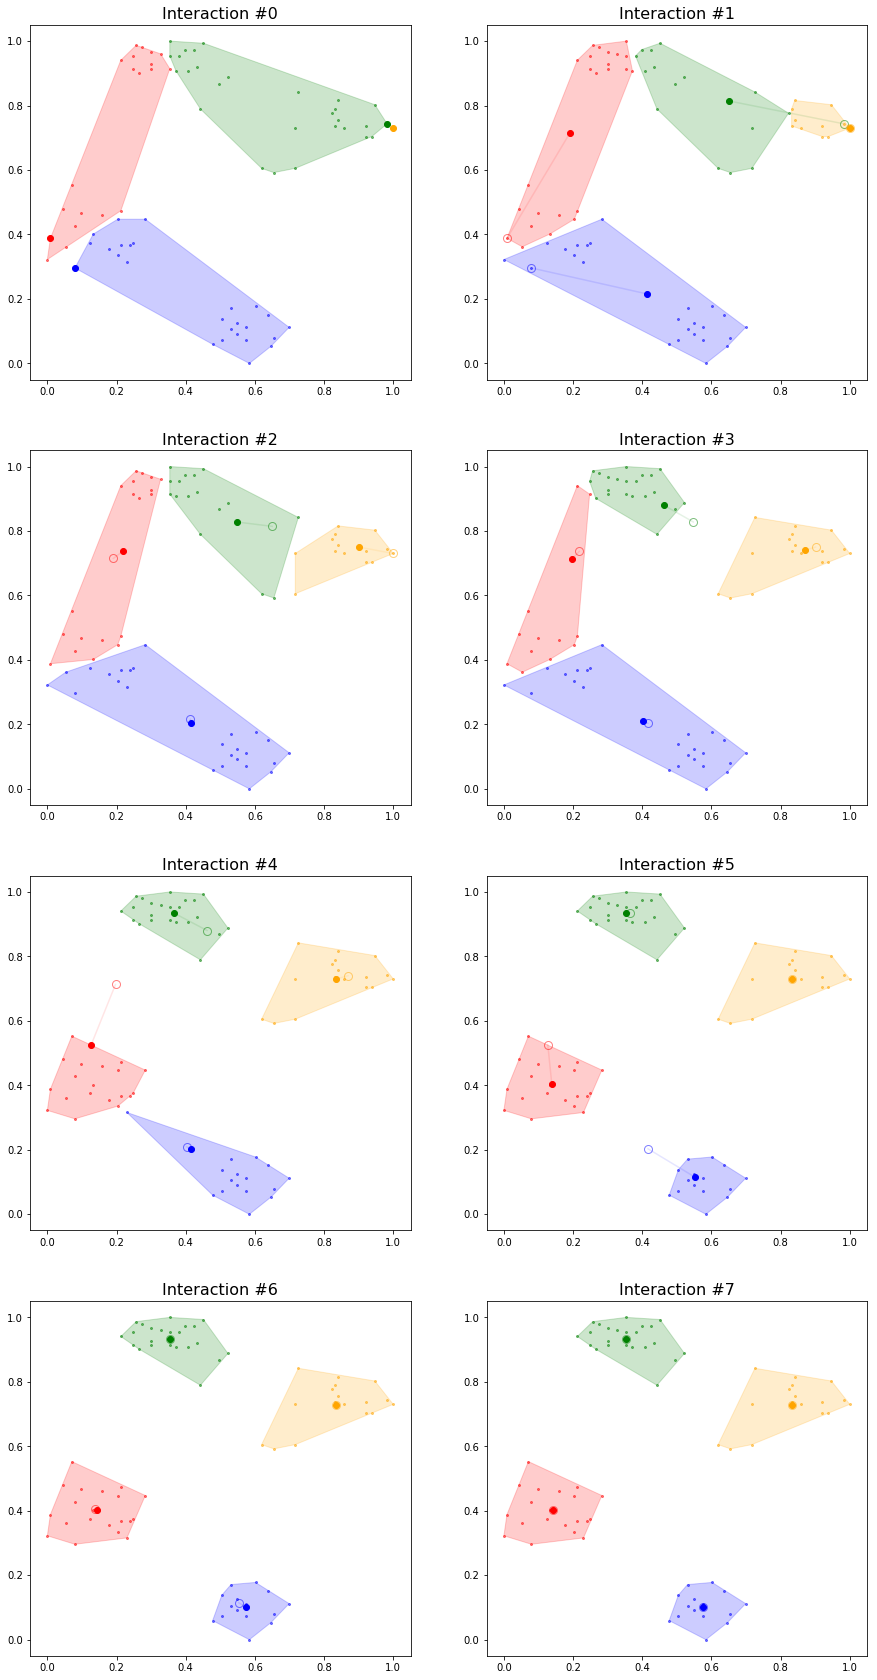

In [14]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,30))
axis = np.reshape(axis, 8)
centroids = initial_centroids
previous_centroids = None

for i in range(len(axis)):
    plot_kmeans(axis[i], objs, colors, legend, centroids, previous_centroids, f"Interaction #{i}", True)
    previous_centroids = centroids
    centroids = one_kmeans_interaction(objs, previous_centroids)

# The Dataset and the Question

- The dataset contains chemical analysis of wines.
- It has 178 samples with 13 attributes.
- More at: https://archive.ics.uci.edu/ml/datasets/wine


## Question: Can we identify groups of wines?


In [15]:
import pandas as pd

In [16]:
features = [
    'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline' 
]

In [17]:
original_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    names = ['Class'] + features,
    dtype = 'float64'
)

In [18]:
original_dataset.shape

(178, 14)

In [19]:
original_dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
Class,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86
Malic acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35
Ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27
Alcalinity of ash,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00
Magnesium,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00
Total phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98
Flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15
Nonflavanoid phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22
Proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85


In [20]:
# Check for missing values
original_dataset.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [21]:
# Let's remove one attribute
# - Class: we don't want to bias the solution towards the existing classification

dataset = original_dataset.drop(['Class'], axis=1)

In [22]:
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
Alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86
Malic acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35
Ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27
Alcalinity of ash,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00
Magnesium,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00
Total phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98
Flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15
Nonflavanoid phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22
Proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85
Color intensity,5.64,4.38,5.68,7.80,4.32,6.75,5.25,5.05,5.20,7.22


In [23]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [24]:
# Let's normalize the data

norm_dataset = MinMaxScaler().fit_transform(dataset)

## k-Means with sklearn

Notes about the implementation:
- Uses `eucliean` distance as similarity
- Uses `k-means++` initialization
- Can run multiple executions and return the best solution found
- Returns centroids, labels, and optimization function values

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [25]:
from sklearn.cluster import KMeans

In [26]:
# Create an empty kmeans object

kmeans = KMeans()

In [27]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
# Apply the algorithm to the dataset and find a solution

kmeans.fit(norm_dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Final optimization value

kmeans.inertia_

35.93867327388289

In [30]:
# Centroids attributes

kmeans.cluster_centers_

array([[0.72645933, 0.23539346, 0.57413709, 0.31874414, 0.39071146,
        0.64695925, 0.56329114, 0.29262436, 0.47106395, 0.37078809,
        0.47657058, 0.69137529, 0.61628842],
       [0.25540166, 0.2249844 , 0.5699409 , 0.59495388, 0.19279176,
        0.32722323, 0.30557406, 0.66037736, 0.32724556, 0.12358541,
        0.50534874, 0.5037594 , 0.15068699],
       [0.50210526, 0.45197628, 0.59625668, 0.58762887, 0.45434783,
        0.19689655, 0.1835443 , 0.22830189, 0.21451104, 0.51203072,
        0.13902439, 0.07362637, 0.2125535 ],
       [0.35122807, 0.16113307, 0.37290553, 0.41821306, 0.21231884,
        0.47505747, 0.38628692, 0.30377358, 0.3595163 , 0.16336746,
        0.47696477, 0.5980464 , 0.15271041],
       [0.30921053, 0.14130435, 0.42780749, 0.38273196, 0.82336957,
        0.3387931 , 0.26529536, 0.20283019, 0.66719243, 0.13289249,
        0.51422764, 0.47527473, 0.34201141],
       [0.38782895, 0.4610919 , 0.63602941, 0.60083763, 0.35665761,
        0.62435345, 0.52149

In [31]:
# Labels for each sample
# In which cluster the sample is

kmeans.labels_

array([0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 3, 3, 1, 3,
       3, 3, 7, 4, 7, 5, 3, 5, 3, 3, 3, 1, 4, 5, 3, 3, 1, 7, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 4, 4, 3, 3, 5, 3, 3, 5, 3, 3, 1, 3, 1, 3, 5,
       5, 3, 1, 1, 1, 1, 3, 3, 7, 3, 5, 5, 5, 5, 5, 3, 3, 1, 1, 1, 2, 2,
       2, 2, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 2, 7, 6, 6, 6, 2, 2, 2, 2, 6,
       7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 2, 7, 6, 6, 6, 6, 6,
       6, 6], dtype=int32)

# Is my clustering solution good?

## The Silhouette Coefficient

- It's a metric for unsupervised clustering
- Works better on convex clusters
- Has boundaries `[-1, 1]`
    - `1`: best solution ever (dense and well separated clusters)
    - `0`: overlapping clusters
    - `-1`: a complete mess

In [32]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [33]:
# The metric value for the solution (clustering)

sil_score = silhouette_score(norm_dataset, kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2113


In [34]:
# Calculates the metric for each sample

sil_samples = silhouette_samples(norm_dataset, kmeans.labels_, metric='euclidean')
sil_samples.shape

(178,)

In [35]:
# The mean value for all scores is the final score

print(sil_samples.mean())
print(sil_score)

0.21128678373479926
0.21128678373479926


In [36]:
def plot_sillhouette(data, labels, silhouette):
    """
        A plot for the silhouette values.
    """
    fig, ax = plt.subplots(figsize=(10,8))
    y_lower = 1
    for i in np.unique(labels):
        S_values = silhouette[labels == i]
        S_values.sort()
        y_upper = y_lower + S_values.shape[0]

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, S_values, alpha=0.75)
        ax.text(-0.05, y_lower + 0.5 * S_values.shape[0], str(i))

        y_lower = y_upper + 1

    ax.axvline(x=silhouette.mean(), color="black", linestyle="--")
    ax.set_xlim([silhouette.min()-0.1, 1])
    ax.set_yticks([])
    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    plt.show()

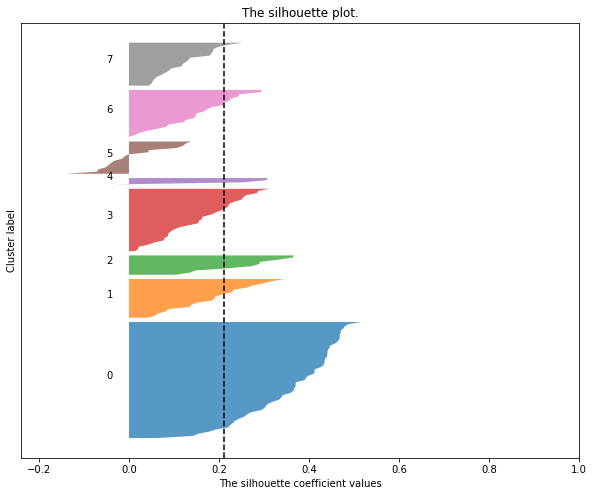

In [37]:
plot_sillhouette(norm_dataset, kmeans.labels_, sil_samples)

# How to choose the number of clusters?

**There is no golden rule to define the number of clusters for a dataset**

- Can be a process based on an evaluation metric (The scientific way)

- Can be defined by the business/product (The money way)

The most important is the ability to explaning why clusters exists

**Let's use the scientific way**

**But first, we need solutions for different number of clusters**

In [38]:
%%time
num_clusters = list(range(2, 25))

models = [KMeans(n_clusters=k, n_init=30).fit(norm_dataset) for k in num_clusters]

CPU times: user 6.6 s, sys: 126 ms, total: 6.73 s
Wall time: 7.46 s


## Using k-Means Inertia

In [39]:
inertia = [m.inertia_ for m in models]

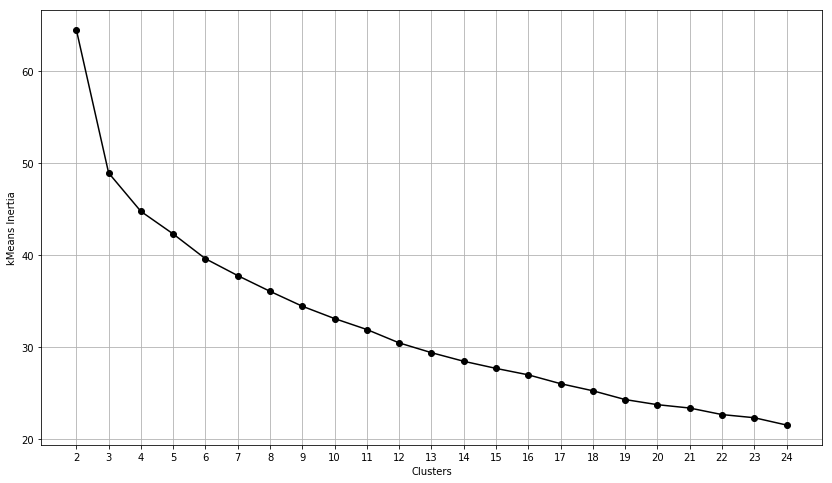

In [40]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(num_clusters, inertia, 'ko-')
ax.set_xticks(num_clusters)
ax.set_ylabel('kMeans Inertia')
ax.set_xlabel('Clusters')
plt.grid(True)
plt.show()

## Using the Silhouette metric

In [41]:
silhouette = [silhouette_score(norm_dataset, m.labels_, metric='euclidean') for m in models]

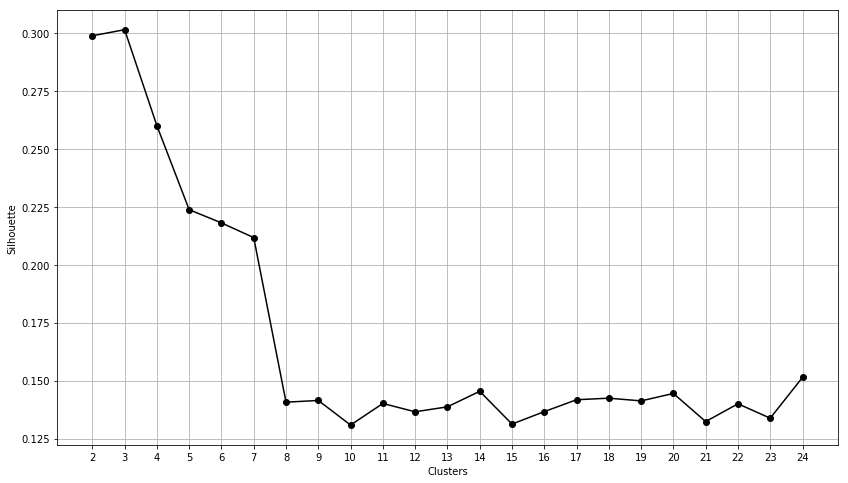

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(num_clusters, silhouette, 'ko-')
ax.set_ylabel('Silhouette')
ax.set_xlabel('Clusters')
ax.set_xticks(num_clusters)
plt.grid(True)
plt.show()

## The Elbow Method

In [43]:
# 1º - Get the centroids

centroids = [m.cluster_centers_ for m in models]

In [44]:
# 2º - Calculate the total within-cluster sum of squares (just between objects in the same cluster)

dist = [np.min(cdist(norm_dataset, c, 'euclidean'),axis=1) for c in centroids]
totWithinSS = [sum(d**2) for d in dist]  

In [45]:
# 3º - Calulate the total sum of squares (between all objects)

totSS = sum(pdist(norm_dataset)**2)/norm_dataset.shape[0]

In [46]:
# 4º - Calculate the between-cluster sum of squares

betweenSS = totSS - totWithinSS

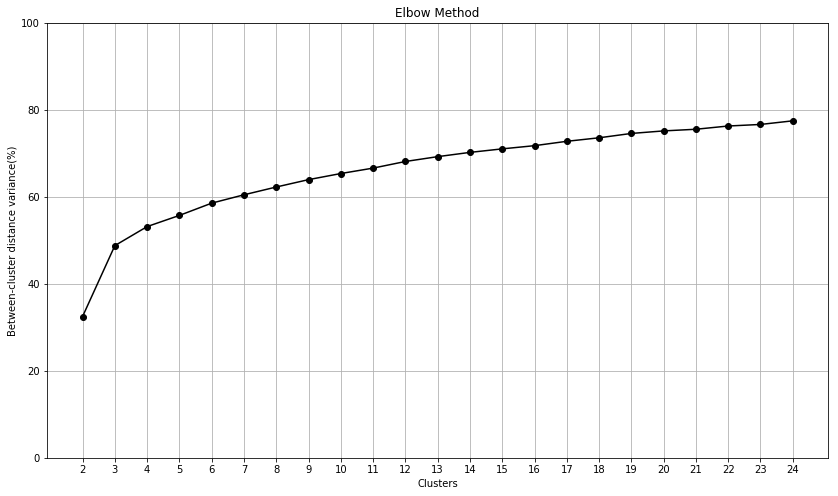

In [47]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(num_clusters, betweenSS/totSS*100, 'ko-')
ax.set_ylim((0,100))
ax.set_xticks(num_clusters)
ax.set_ylabel('Between-cluster distance variance(%)')
ax.set_xlabel('Clusters')
plt.grid(True)
plt.title('Elbow Method')
plt.show()

# Ways to present a solution

In [48]:
k = 3

In [49]:
final_model = models[num_clusters.index(k)]

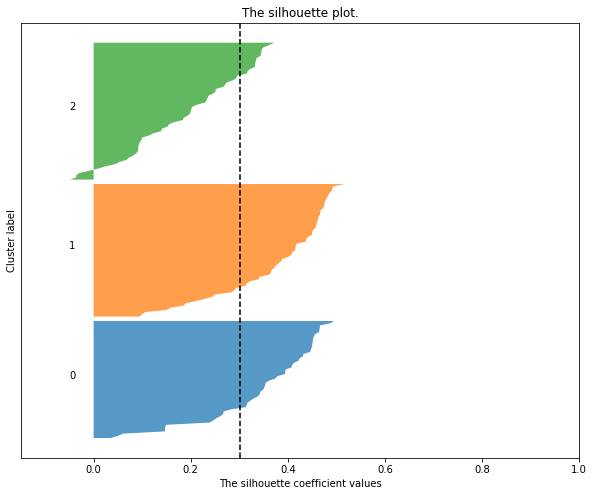

In [50]:
sil_samples = silhouette_samples(norm_dataset, final_model.labels_, metric='euclidean')
plot_sillhouette(norm_dataset, final_model.labels_, sil_samples)

## Using PCA

- Can be ploted on 2D or 3D
- Shows principal components, not the features

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2).fit(norm_dataset)
pca_features = pca.transform(norm_dataset)

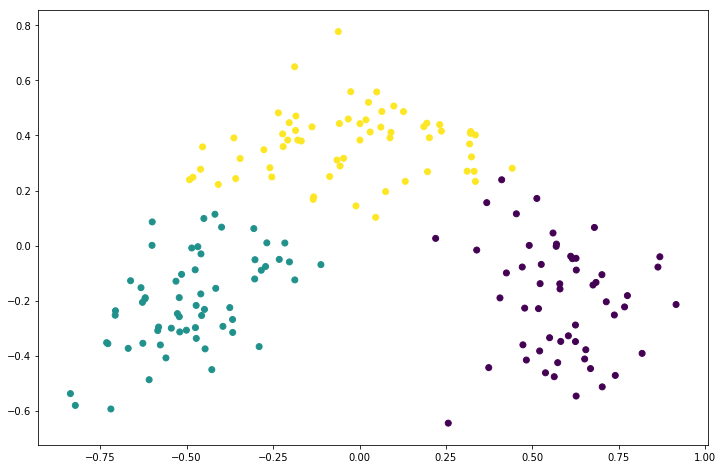

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pca_features[:,0], pca_features[:,1], c=final_model.labels_)
ax.set_ylabel('')
ax.set_xlabel('')
plt.grid(False)
plt.show()

## Using Boxplot

- Plots all clusters in the same chart
- Features do not need to be normalized
- One chart per feature

In [54]:
import seaborn as sns
from matplotlib import gridspec

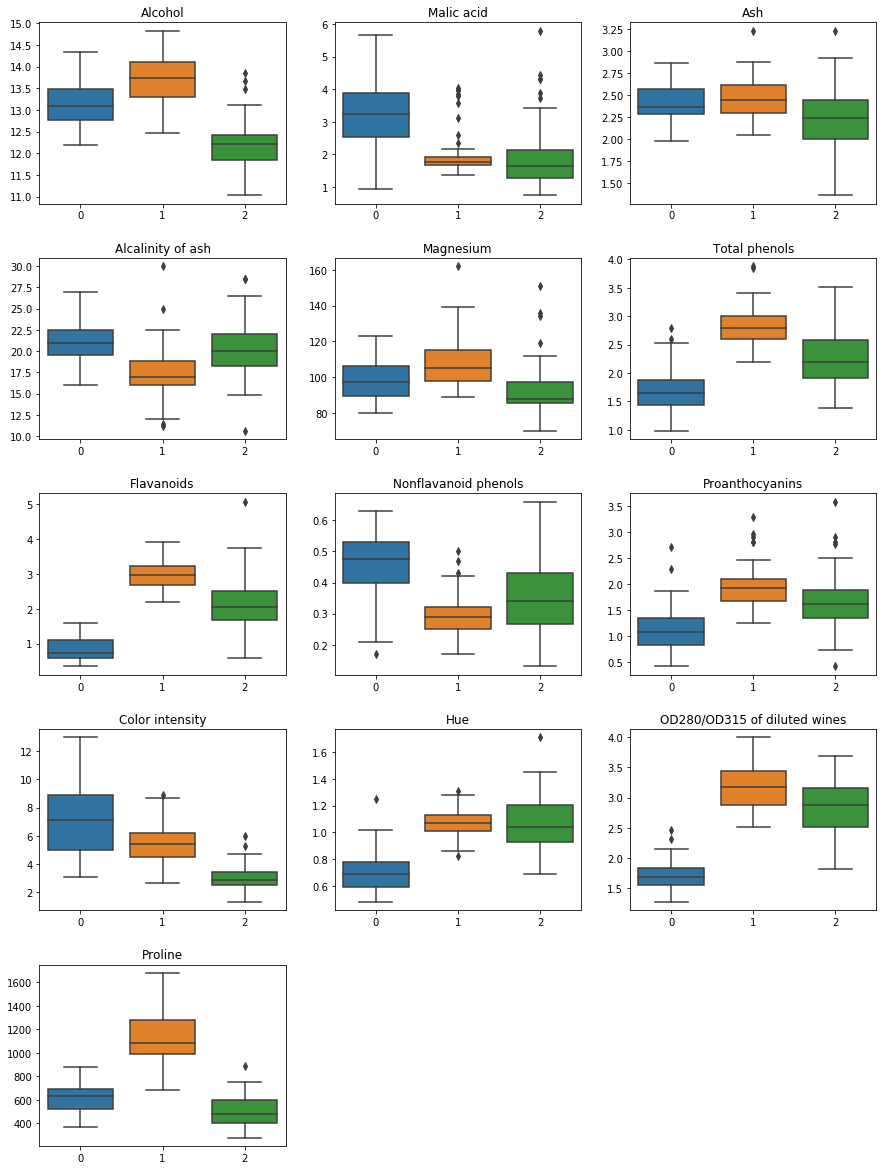

In [55]:
gs = gridspec.GridSpec(6, 3, hspace=0.3)
fig = plt.figure(figsize=(15, 25))
label_dataset = dataset.copy()
label_dataset['cluster'] = final_model.labels_

for idx in range(len(features)):
    ax = fig.add_subplot(gs[idx])
    
    sns.boxplot(x='cluster', y=features[idx], data=label_dataset, ax=ax)

    plt.title(features[idx])
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

## Using Histograms

- Plots all clusters in the same chart
- Features do not need to be normalized
- One chart per feature

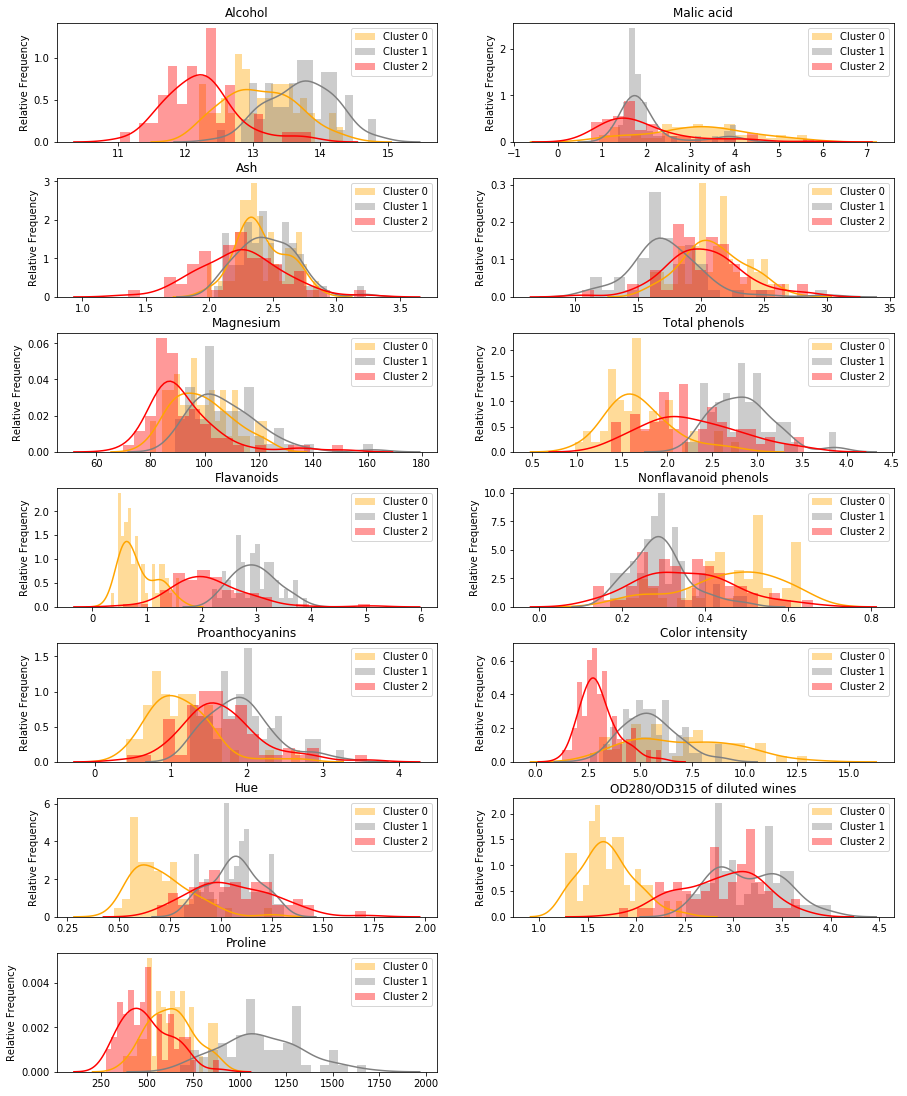

In [56]:
gs = gridspec.GridSpec(9, 2, hspace=0.3)
fig = plt.figure(figsize=(15, 25))
colors = ['orange', 'gray', 'red']

for idx in range(len(features)):
    ax = fig.add_subplot(gs[idx])
    
    for i in range(k):
        values = dataset.iloc[final_model.labels_==i, idx].values
        sns.distplot(values, bins=20, label=f"Cluster {i}", hist_kws={"alpha": 0.4}, color=colors[i], ax=ax)

    plt.title(features[idx])
    plt.ylabel('Relative Frequency')

    plt.legend()
    
plt.show()

## Using Radar chart

- Plots all features in the same chart
- Features need to be normalized
- One chart per cluster, or all clusters overlapping

In [57]:
from math import pi, ceil

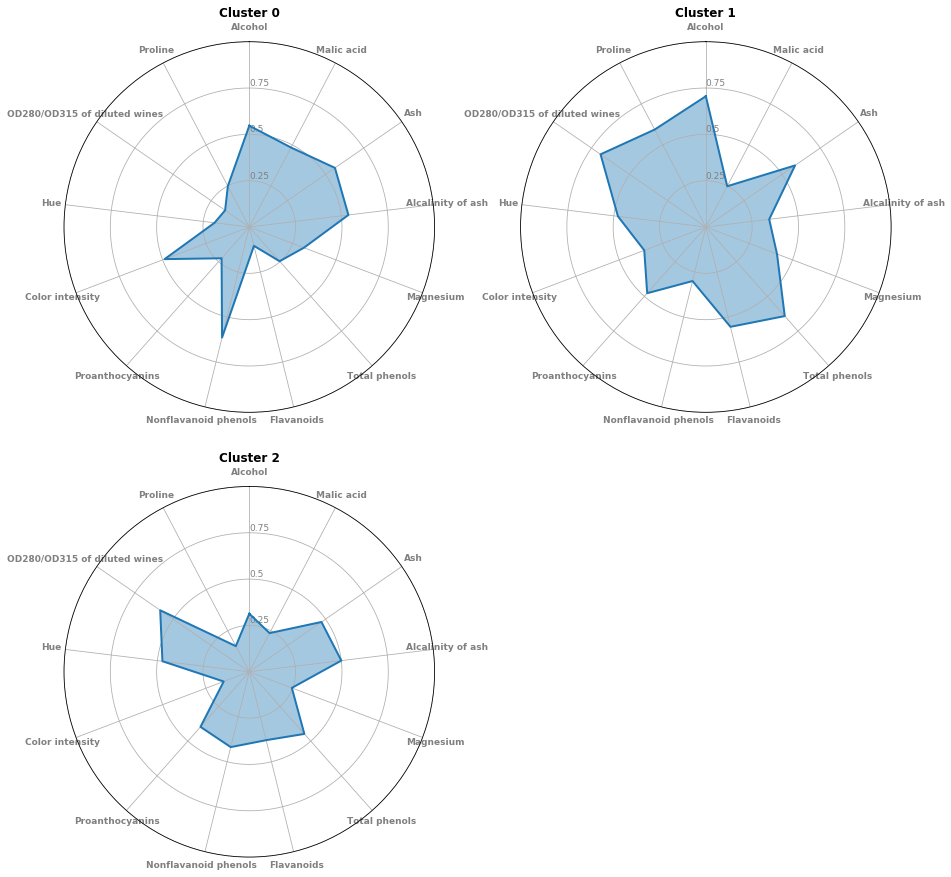

In [58]:
N = len(features)
    
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 15))

for idx in range(k):
    ax = fig.add_subplot(gs[idx], projection='polar')
    
    angles = [n / float(N) * 2 * pi for n in range(N)]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles)
    ax.set_xticklabels(features, fontdict={'fontweight':'bold'})

    ax.set_rlabel_position(0)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['', '0.25', '0.5', '0.75', ''])

    ax.tick_params(axis='both', colors='grey', labelsize=9)

    ax.set_ylim(0,1)

    values = norm_dataset[final_model.labels_==idx, :].mean(axis=0).tolist()

    angles += angles[:1]
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)

    ax.set_title(f"Cluster {idx}", fontdict={'fontweight':'bold', 'fontsize':12})
    
plt.show()

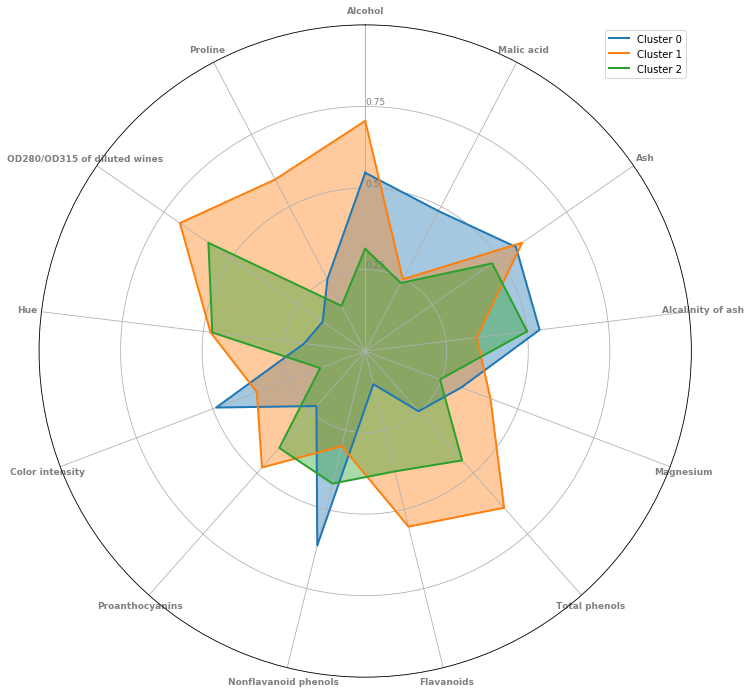

In [59]:
N = len(features)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels(features, fontdict={'fontweight':'bold'})

ax.set_rlabel_position(0)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['', '0.25', '0.5', '0.75', ''])

ax.tick_params(axis='both', colors='grey', labelsize=9)

ax.set_ylim(0,1)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
for idx in range(k):
    values = norm_dataset[final_model.labels_==idx, :].mean(axis=0).tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {idx}")
    ax.fill(angles, values, alpha=0.4)

plt.legend()
plt.show()